<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# Programa de Especialización en Python

## Tema 5. Redes Neuronales 

### Prof. Manuel Sigüeñas, M.Sc.(c)

## Definición

#Las Redes Neuronales Artificiales son modelos computacionales inspirados en las neuronas biológicas, y que están conformadas por un conjunto de unidades de cómputo básico (neuronas) las cuales están conectadas entre ellas de múltiples maneras. Estas conexiones estarán definidas por unos pesos los cuales determinarán la fuerza o importancia de dichas conexiones, y durante el proceso de aprendizaje o entrenamiento de la red, serán estos pesos los que se ajustarán con el fin de producir la salida adecuada según la entrada que se aplique a la red.

## Caso practico

Este conjunto de datos es un subconjunto de la Encuesta nacional de prevalencia de anticonceptivos de Indonesia de 1987. Las muestras son mujeres casadas que no estaban embarazadas o no saben si estaban en el momento de la entrevista. El problema es predecir la elección actual del método anticonceptivo (sin uso, métodos a largo plazo o métodos a corto plazo) de una mujer en función de sus características demográficas y socioeconómicas.

### Información del atributo:

1. Edad de la esposa (numérica)

2. Educación de la esposa (categórica) 1 = baja, 2, 3, 4 = alta

3. Educación del esposo (categórica) 1 = baja, 2, 3, 4 = alta

4. Número de hijos nacidos (numérico)

5. Religión de la esposa (binaria) 0 = No Islam, 1 = Islam

6. ¿La esposa ahora está trabajando? (binario) 0 = Sí, 1 = No

7. Ocupación del esposo (categórica) 1, 2, 3, 4

8. Índice de nivel de vida (categórico) 1 = bajo, 2, 3, 4 = alto

9. Exposición a los medios (binario) 0 = Bueno, 1 = No bueno

10. Método anticonceptivo utilizado (atributo de clase) 1 = Sin uso, 2 = A largo plazo, 3 = A corto plazo

Fuentes:

     (a) Origen: Este conjunto de datos es un subconjunto del nacional de Indonesia de 1987
                  Encuesta de prevalencia de anticonceptivos
                  
     (b) Creador: Tjen-Sien Lim (limt@stat.wisc.edu)
     
     (c) Donante: Tjen-Sien Lim (limt@stat.wisc.edu)
     
     (c) Fecha: 7 de junio de 1997

Author: [Tjen-Sien Lim](limt@stat.wisc.edu) 
Source: [As obtained from UCI](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_metodoanticonceptivo = pd.read_csv('https://query.data.world/s/kmtzduntrfduzq7ock75atyluguk6z')


In [3]:
df_metodoanticonceptivo.columns = ['edad_esposa', 'educacion_esposa', 'educacion_esposo', 'numero_hijos_nacidos',
                   'religion_esposa', 'trabaja_esposa', 'ocupacion_esposo',
                   'ind_nivel_vida', 'expo_medios', 'metodo_anticonceptivo']
df_metodoanticonceptivo.head(10)

,edad_esposa,educacion_esposa,educacion_esposo,numero_hijos_nacidos,religion_esposa,trabaja_esposa,ocupacion_esposo,ind_nivel_vida,expo_medios,metodo_anticonceptivo
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1
5,38,2,3,6,1,1,3,2,0,1
6,21,3,3,1,1,0,3,2,0,1
7,27,2,3,3,1,1,3,4,0,1
8,45,1,1,8,1,1,2,2,1,1
9,38,1,3,2,1,0,3,3,1,1


In [4]:
df_metodoanticonceptivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   edad_esposa            1472 non-null   int64
 1   educacion_esposa       1472 non-null   int64
 2   educacion_esposo       1472 non-null   int64
 3   numero_hijos_nacidos   1472 non-null   int64
 4   religion_esposa        1472 non-null   int64
 5   trabaja_esposa         1472 non-null   int64
 6   ocupacion_esposo       1472 non-null   int64
 7   ind_nivel_vida         1472 non-null   int64
 8   expo_medios            1472 non-null   int64
 9   metodo_anticonceptivo  1472 non-null   int64
dtypes: int64(10)
memory usage: 115.1 KB


In [24]:
#Para que funcione la curva roc se elimino la clase 1 "Sin uso"
df_metodoanticonceptivo=df_metodoanticonceptivo[df_metodoanticonceptivo.metodo_anticonceptivo!=1]

Nuestro objetivo en esta práctica será hacer uso de todas estas variables para construir una red neurona artificial capaz de predecir la eleccion actual del metodo anticonceptivo de una mujer.

#### Red Neuronal Artificial

La implementación de la red neuronal la haremos haciendo uso del paquete H2O, el cual es una librería para análisis predictivo y machine learning que incorpora funciones para crear redes neuronales artificiales así como modelos de deep learning.

In [5]:
import h2o

In [6]:
h2o.init ()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,8 hours 16 mins
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,6 months and 21 days !!!
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_z9tfi2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.081 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Cuando se inicializa h2o, se generará un mensaje que hace referencia a la conexión exitosa de la librería al cluster que realizará los cálculos. El parámetro nthreads = -1 se refiere a que se harán uso de todos los CPU disponibles del equipo para realizarlos.

In [25]:
df_conceptivo=h2o.H2OFrame(df_metodoanticonceptivo)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:
x = df_conceptivo.col_names[0:9]### Todos los nombres de las anteriores variables
y = df_conceptivo.col_names[9]###La variable Target

In [27]:
x

['edad_esposa',
 'educacion_esposa',
 'educacion_esposo',
 'numero_hijos_nacidos',
 'religion_esposa',
 'trabaja_esposa',
 'ocupacion_esposo',
 'ind_nivel_vida',
 'expo_medios']

In [28]:
y

'metodo_anticonceptivo'

In [29]:
df_conceptivo[y] = df_conceptivo[y].asfactor()# convertir a factor la variable target si no bota un error en el entrenamiento

In [30]:
train,valid, test = df_conceptivo.split_frame([0.75, 0.15], 
                                              seed=2020)#Dividir la data de train,valid,test

In [31]:
print (train.nrows)

634


In [32]:
print (valid.nrows)

135


In [33]:
print (test.nrows)

75


In [20]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
m1= H2ODeepLearningEstimator(model_id='dl_fit1',            
                              activation = "tanh", #función de activación
                              distribution = "multinomial", #distribución de nuestro target
                              hidden = [120, 120, 120, 120, 120, 120],
                              epochs = 500,
                              seed = 2019)

- **activation** se refiere a la función de activación que se empleará en cada neurona, que en este caso es el tanh, 
- **hidden** establece la cantidad de capas ocultas así como neuronas en cada una de ellas. En este caso, la red neuronal creada tendrá tres capas ocultas, cada una de ellas con 12 neuronas. 
- **epochs** establece la cantidad de veces que se pasarán los datos de etrenamiento a fin de aplicar el algoritmo de aprendizaje. 

In [34]:
m1.train(x=x, #ingresar etiquetas de los predictores
         y=y, #ingresar etiqueta del target
         training_frame=train,#ingresar datos de entrenamiento
         validation_frame=valid)#ingresar datos de validación

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [35]:
p_train = m1.predict(train)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [36]:
p_train

predict,p2,p3
3,0.0878945,0.912106
3,0.16114,0.83886
3,0.11611,0.88389
3,0.0382227,0.961777
3,0.21195,0.78805
3,0.374202,0.625798
3,0.0178622,0.982138
3,0.102214,0.897786
3,0.119666,0.880334
3,0.0874461,0.912554


In [37]:
p_test = m1.predict(test)#Testeo del modelo

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [38]:
p_test#Porcentaje de prediccion

predict,p2,p3
3,0.0438968,0.956103
3,0.145176,0.854824
3,0.0260651,0.973935
3,0.0208221,0.979178
3,0.0594178,0.940582
3,0.150206,0.849794
3,0.0634373,0.936563
3,0.258216,0.741784
3,0.114259,0.885741
3,0.279778,0.720222


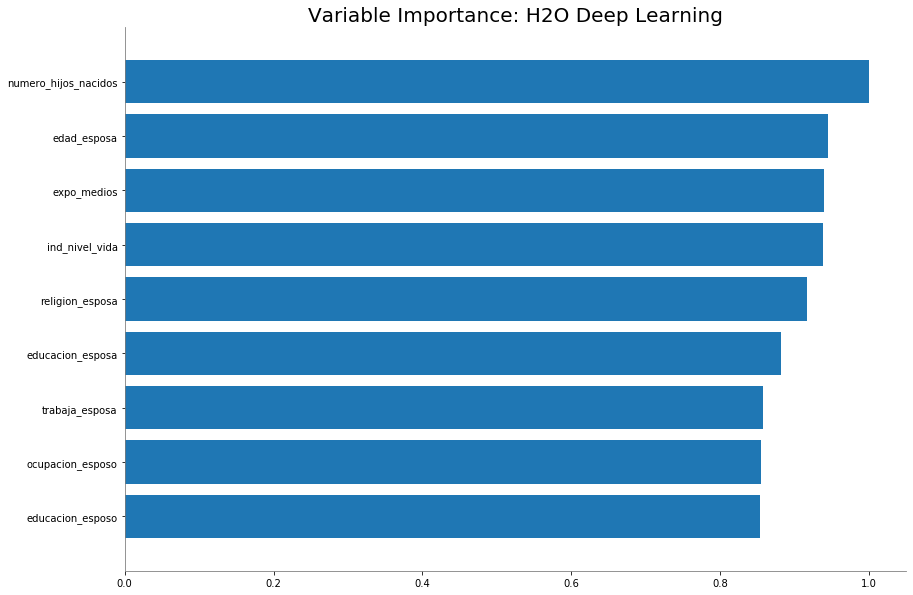

In [39]:
# build the variable importances plot:
m1.varimp_plot()

In [40]:
# build the roc curve:
perf_t = m1.model_performance(train)
perf_t


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.2692720192970789
RMSE: 0.5189142696988385
LogLoss: 0.8360395556147739
Mean Per-Class Error: 0.3332708333333333
AUC: 0.7124322916666667
AUCPR: 0.7927675611460014
Gini: 0.4248645833333333

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5740417356965795: 


,,2,3,Error,Rate
0,2,47.0,203.0,0.812,(203.0/250.0)
1,3,18.0,366.0,0.0469,(18.0/384.0)
2,Total,65.0,569.0,0.3486,(221.0/634.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.574042,0.768101,342.0
1,max f2,0.169719,0.885201,398.0
2,max f0point5,0.912858,0.734954,164.0
3,max accuracy,0.813298,0.678233,242.0
4,max precision,0.991966,1.000000,0.0
5,max recall,0.169719,1.000000,398.0
6,max specificity,0.991966,1.000000,0.0
7,max absolute_mcc,0.912858,0.326512,164.0
8,max min_per_class_accuracy,0.912592,0.664000,165.0
9,max mean_per_class_accuracy,0.912858,0.666729,164.0



Gains/Lift Table: Avg response rate: 60,57 %, avg score: 83,89 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011041,0.990734,1.651042,1.651042,1.000000,0.991452,1.000000,0.991452,0.018229,0.018229,65.104167,65.104167
1,,2,0.020505,0.988661,1.651042,1.651042,1.000000,0.989910,1.000000,0.990740,0.015625,0.033854,65.104167,65.104167
2,,3,0.029968,0.986639,1.651042,1.651042,1.000000,0.987953,1.000000,0.989860,0.015625,0.049479,65.104167,65.104167
3,,4,0.041009,0.985501,1.415179,1.587540,0.857143,0.986211,0.961538,0.988878,0.015625,0.065104,41.517857,58.754006
4,,5,0.050473,0.984626,1.651042,1.599447,1.000000,0.985169,0.968750,0.988182,0.015625,0.080729,65.104167,59.944661
5,,6,0.100946,0.978284,1.444661,1.522054,0.875000,0.981507,0.921875,0.984845,0.072917,0.153646,44.466146,52.205404
6,,7,0.149842,0.972382,1.278226,1.442489,0.774194,0.975169,0.873684,0.981687,0.062500,0.216146,27.822581,44.248904
7,,8,0.200315,0.964111,1.238281,1.391035,0.750000,0.967388,0.842520,0.978085,0.062500,0.278646,23.828125,39.103510
8,,9,0.299685,0.954755,1.153108,1.312144,0.698413,0.958550,0.794737,0.971607,0.114583,0.393229,15.310847,31.214364
9,,10,0.400631,0.940425,1.264079,1.300033,0.765625,0.948816,0.787402,0.965864,0.127604,0.520833,26.407878,30.003281


In [42]:
# build the roc curve:
perf = m1.model_performance(test)
perf


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.30478177494610775
RMSE: 0.5520704438258833
LogLoss: 0.9549722520270025
Mean Per-Class Error: 0.4097222222222222
AUC: 0.5239197530864198
AUCPR: 0.7123920657842582
Gini: 0.04783950617283961

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.368769244507228: 


,,2,3,Error,Rate
0,2,0.0,27.0,1.0,(27.0/27.0)
1,3,0.0,48.0,0.0,(0.0/48.0)
2,Total,0.0,75.0,0.36,(27.0/75.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.368769,0.780488,74.0
1,max f2,0.368769,0.898876,74.0
2,max f0point5,0.368769,0.689655,74.0
3,max accuracy,0.368769,0.640000,74.0
4,max precision,0.990692,1.000000,0.0
5,max recall,0.368769,1.000000,74.0
6,max specificity,0.990692,1.000000,0.0
7,max absolute_mcc,0.956842,0.207002,16.0
8,max min_per_class_accuracy,0.917309,0.518519,37.0
9,max mean_per_class_accuracy,0.956842,0.590278,16.0



Gains/Lift Table: Avg response rate: 64,00 %, avg score: 85,81 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013333,0.988733,1.562500,1.562500,1.000000,0.990692,1.000000,0.990692,0.020833,0.020833,56.250000,56.250000
1,,2,0.026667,0.985739,1.562500,1.562500,1.000000,0.988045,1.000000,0.989368,0.020833,0.041667,56.250000,56.250000
2,,3,0.040000,0.983055,1.562500,1.562500,1.000000,0.983241,1.000000,0.987326,0.020833,0.062500,56.250000,56.250000
3,,4,0.040000,0.982428,0.000000,1.562500,0.000000,0.000000,1.000000,0.987326,0.000000,0.062500,-100.000000,56.250000
4,,5,0.053333,0.980801,1.562500,1.562500,1.000000,0.982395,1.000000,0.986093,0.020833,0.083333,56.250000,56.250000
5,,6,0.106667,0.974183,1.171875,1.367188,0.750000,0.977070,0.875000,0.981582,0.062500,0.145833,17.187500,36.718750
6,,7,0.160000,0.966653,0.781250,1.171875,0.500000,0.970677,0.750000,0.977947,0.041667,0.187500,-21.875000,17.187500
7,,8,0.200000,0.957322,1.562500,1.250000,1.000000,0.960458,0.800000,0.974449,0.062500,0.250000,56.250000,25.000000
8,,9,0.306667,0.940358,0.781250,1.086957,0.500000,0.950495,0.695652,0.966117,0.083333,0.333333,-21.875000,8.695652
9,,10,0.400000,0.932737,0.669643,0.989583,0.428571,0.936774,0.633333,0.959270,0.062500,0.395833,-33.035714,-1.041667


In [43]:
perf.confusion_matrix() ##La matriz de confusion


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.368769244507228: 


,,2,3,Error,Rate
0,2,0.0,27.0,1.0,(27.0/27.0)
1,3,0.0,48.0,0.0,(0.0/48.0)
2,Total,0.0,75.0,0.36,(27.0/75.0)


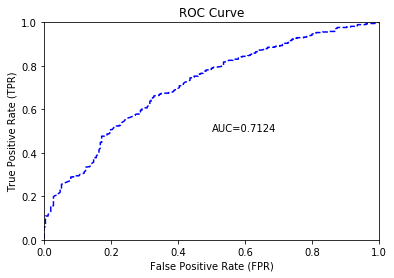

In [44]:
# build the roc curve:
perf = m1.model_performance(train)
perf.plot(type = "roc")

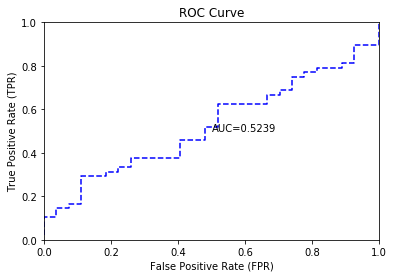

In [45]:
# build the roc curve:
perf = m1.model_performance(test)
perf.plot(type = "roc")

## Caso practico

Este es un proyecto de clasificación binaria que tiene como objetivo predecir si la carrera de un jugador de la NBA durará más de 5 años o no. Los datos incluyen las métricas de rendimiento de los jugadores de la NBA en su carrera, mediante las cuales se deben hacer las predicciones.

### Información del atributo:

* Name    :Nombre
* GP   :Juegos jugados
* MIN  :Minutos jugados
* PTS :Puntos por partido
* FGM     :Objetivos de campo realizados
* FGA   :Objetivos de campo intentados
* FG%   :Porcentaje de gol de campo
* 3P Mode   :3 puntos hechos
* 3PA   :Intentos de 3 puntos
* 3P%   :3 puntos por ciento
* FTM   :Tiro libre hecho
* FTA   :Intentos de lanzamiento libre
* FT%   :Porcentaje de lanzamiento libre
* OREB   :Rebotes ofensivos
* DREB   :Rebotes defensivos
* REB   :Rebotes
* AST   :Asistencias
* STL   :Roba
* BLK   :Bloques
* TOV   :Pérdidas de balón
* TARGET_5Yrs   :Variable predictora (1-Si la duración de la carrera>= 5 años) y (0-si<5)

Fuente:https://github.com/PranayMalhotra/NBA-player-career-lengths

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_arrest = pd.read_csv('D:/SOCIAL DATA/Dropbox/Python 4ta edición - Programa Completo/3. avanzado/sesión_04/datos/nba_logreg2.csv',  sep=';')
df_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

In [43]:
#Separando el nombre
name = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB'
            ,'DREB','REB','AST','STL','BLK','TOV','TARGET_5Yrs'
            ]
df_arrest = df_arrest.loc[:, name]

## Actividades:
### 1-Entrenar el modelo predictivo, previamente considerar 80% de datos entrenamiento y 20% prueba
### 2-Obtener el AUC de la curva
### 3-Generar las variables mas importantes
### 4-Construir la curva ROC

In [7]:
h2o.shutdown() #finaliza la sesión con H20

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_8cc7 closed.
